In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df.info

<bound method DataFrame.info of            Date        Open        High         Low       Close    Volume  \
0     6/29/2010   19.000000   25.000000   17.540001   23.889999  18766300   
1     6/30/2010   25.790001   30.420000   23.299999   23.830000  17187100   
2      7/1/2010   25.000000   25.920000   20.270000   21.959999   8218800   
3      7/2/2010   23.000000   23.100000   18.709999   19.200001   5139800   
4      7/6/2010   20.000000   20.000000   15.830000   16.110001   6866900   
...         ...         ...         ...         ...         ...       ...   
1687  3/13/2017  244.820007  246.850006  242.779999  246.169998   3010700   
1688  3/14/2017  246.110001  258.119995  246.020004  258.000000   7575500   
1689  3/15/2017  257.000000  261.000000  254.270004  255.729996   4816600   
1690  3/16/2017  262.399994  265.750000  259.059998  262.049988   7100400   
1691  3/17/2017  264.000000  265.329987  261.200012  261.500000   6475900   

       Adj Close  
0      23.889999  
1    

In [5]:
df.shape

(1692, 7)

In [6]:
df.size

11844

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [8]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.214999,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

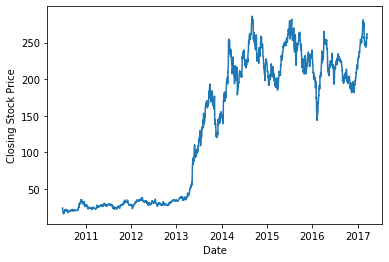

In [10]:
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

In [11]:
df = df['Open'].values
df=df.reshape(-1, 1)

In [12]:
df.shape

(1692, 1)

In [13]:
dataset_train=np.array(df[:int(df.shape[0]*0.8)])
dataset_test=np.array(df[:int(df.shape[0]*0.2):])
print(dataset_train.shape)
print(dataset_test.shape)

(1353, 1)
(338, 1)


In [15]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models
from tensorflow.keras import Sequential
from keras.layers import LSTM, Dense, Dropout

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.01053291],
       [0.03553936],
       [0.03262991],
       [0.02526425],
       [0.01421574]])

In [17]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.01053291],
       [0.03553936],
       [0.03262991],
       [0.02526425],
       [0.01421574]])

In [18]:
def createdata(df):
    x=[]
    y=[]
    for i in range(50,df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
        
    x=np.array(x)
    y=np.array(y)
    return x,y

In [19]:
x_train,y_train=createdata(dataset_train)
x_test,y_test=createdata(dataset_test)

In [20]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [21]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
41/41 [==============================] - 35s 329ms/step - loss: 0.0265
Epoch 2/50
41/41 [==============================] - 13s 312ms/step - loss: 0.0047
Epoch 3/50
41/41 [==============================] - 12s 301ms/step - loss: 0.0039
Epoch 4/50
41/41 [==============================] - 14s 346ms/step - loss: 0.0037
Epoch 5/50
41/41 [==============================] - 14s 337ms/step - loss: 0.0035
Epoch 6/50
41/41 [==============================] - 13s 321ms/step - loss: 0.0031
Epoch 7/50
41/41 [==============================] - 13s 315ms/step - loss: 0.0034
Epoch 8/50
41/41 [==============================] - 13s 317ms/step - loss: 0.0034
Epoch 9/50
41/41 [==============================] - 12s 291ms/step - loss: 0.0032
Epoch 10/50
41/41 [==============================] - 14s 344ms/step - loss: 0.0031
Epoch 11/50
41/41 [==============================] - 14s 332ms/step - loss: 0.0030
Epoch 12/50
41/41 [==============================] - 12s 289ms/step - loss: 0.0031
Epoch 13/50
4

In [27]:
predictions=model.predict(x_test)
predicted_closing_price=scaler.inverse_transform(predictions)

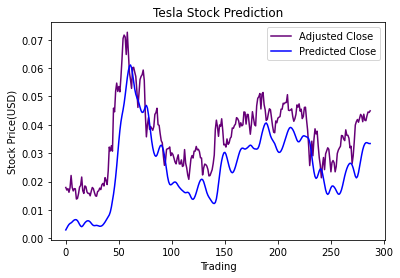

In [46]:
def plotting(actual,prediction,title='Tesla Stock Prediction',y_label='Stock Price(USD)',x_label='Trading'):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.plot(actual,'#660077',label='Adjusted Close')
    plt.plot(prediction,'#0000FF',label='Predicted Close')
    ax.set_title(title)
    ax.legend(loc='upper right')
    plt.show()

plotting(y_test,predictions)